# Capstone Project for Microsoft Professional Program Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

matplotlib.style.use('ggplot')

In [2]:
X = pd.read_csv('train_values.csv', index_col=0)
Y = pd.read_csv('train_labels.csv', index_col=0)

# Explore Income

In [3]:
#Summary statistics of 'Income'

Y.describe()

,income
count,17107.000000
mean,30.592003
std,11.302597
min,9.400000
25%,23.000000
50%,28.700000
75%,35.600000
max,151.500000


In [4]:
#What is the median income?

Y.median(axis=0)

income    28.7
dtype: float64

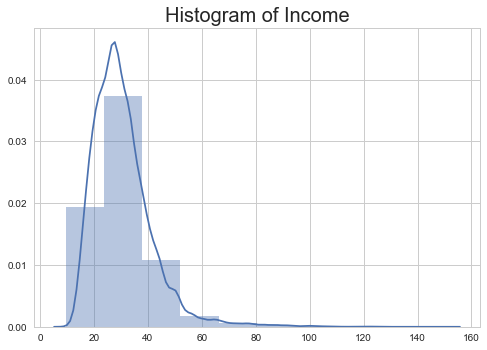

In [5]:
#Show the distribution of income

sns.set(style="whitegrid")
ax = sns.distplot(Y, bins=10)
plt.title('Histogram of Income', fontsize=20)
plt.show()

In [3]:
#Create a new dataframe Z including all variables and the income

Z = X.copy()
Z['income'] = Y['income']
Z.shape

(17107, 298)

In [7]:
pd.options.display.max_rows = 4000
Z.isnull().sum(axis=0)

academics__program_assoc_agriculture                                             714
academics__program_assoc_architecture                                            714
academics__program_assoc_biological                                              714
academics__program_assoc_business_marketing                                      714
academics__program_assoc_communication                                           714
academics__program_assoc_communications_technology                               714
academics__program_assoc_computer                                                714
academics__program_assoc_construction                                            714
academics__program_assoc_education                                               714
academics__program_assoc_engineering                                             714
academics__program_assoc_engineering_technology                                  714
academics__program_assoc_english                                 

# Data Exploration

### Academics Program

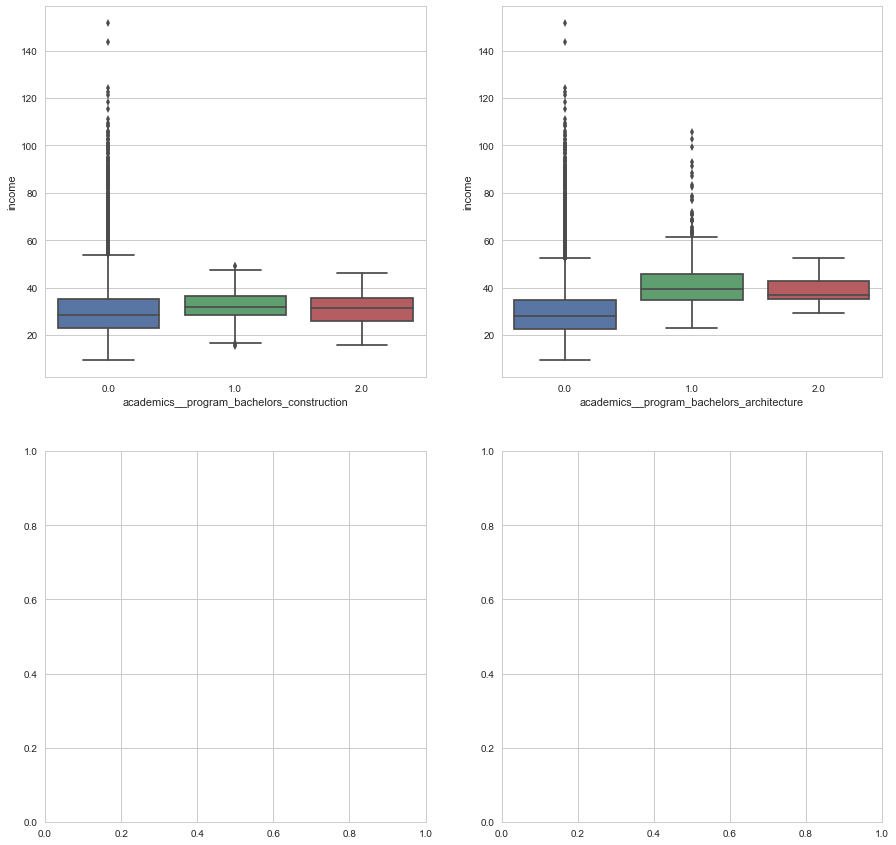

In [8]:
sns.set_style('whitegrid')
f,axes = plt.subplots(2,2,figsize=(15,15))

sns.boxplot(y="income", x="academics__program_bachelors_construction", data=Z, ax=axes[0,0])
sns.boxplot(y="income", x="academics__program_bachelors_architecture", data=Z, ax=axes[0,1])

plt.show()

In [9]:
from IPython.display import display

display(Z.groupby('academics__program_assoc_agriculture').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_architecture').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_biological').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_business_marketing').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_communication').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_communications_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_computer').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_construction').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_education').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_engineering').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_engineering_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_english').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_ethnic_cultural_gender').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_family_consumer_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_health').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_history').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_humanities').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_language').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_legal').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_library').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_mathematics').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_mechanic_repair_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_military').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_multidiscipline').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_parks_recreation_fitness').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_personal_culinary').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_philosophy_religious').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_physical_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_precision_production').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_psychology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_public_administration_social_service').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_resources').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_science_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_security_law_enforcement').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_social_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_theology_religious_vocation').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_transportation').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_assoc_visual_performing').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_agriculture').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_architecture').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_biological').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_business_marketing').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_communication').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_communications_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_computer').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_construction').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_education').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_engineering').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_engineering_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_english').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_ethnic_cultural_gender').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_family_consumer_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_health').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_history').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_humanities').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_language').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_legal').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_library').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_mathematics').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_mechanic_repair_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_military').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_multidiscipline').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_parks_recreation_fitness').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_personal_culinary').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_philosophy_religious').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_physical_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_precision_production').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_psychology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_public_administration_social_service').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_resources').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_science_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_security_law_enforcement').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_social_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_theology_religious_vocation').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_transportation').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_bachelors_visual_performing').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_agriculture').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_architecture').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_biological').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_business_marketing').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_communication').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_communications_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_computer').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_construction').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_education').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_engineering').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_engineering_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_english').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_ethnic_cultural_gender').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_family_consumer_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_health').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_history').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_humanities').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_language').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_legal').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_library').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_mathematics').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_mechanic_repair_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_military').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_multidiscipline').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_parks_recreation_fitness').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_personal_culinary').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_philosophy_religious').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_physical_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_precision_production').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_psychology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_public_administration_social_service').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_resources').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_science_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_security_law_enforcement').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_social_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_theology_religious_vocation').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_transportation').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_1_yr_visual_performing').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_agriculture').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_architecture').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_biological').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_business_marketing').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_communication').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_communications_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_computer').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_construction').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_education').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_engineering').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_engineering_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_english').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_ethnic_cultural_gender').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_family_consumer_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_health').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_history').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_humanities').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_language').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_legal').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_library').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_mathematics').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_mechanic_repair_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_military').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_multidiscipline').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_parks_recreation_fitness').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_personal_culinary').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_philosophy_religious').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_physical_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_precision_production').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_psychology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_public_administration_social_service').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_resources').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_science_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_security_law_enforcement').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_social_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_theology_religious_vocation').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_transportation').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_2_yr_visual_performing').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_agriculture').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_architecture').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_biological').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_business_marketing').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_communication').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_communications_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_computer').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_construction').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_education').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_engineering').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_engineering_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_english').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_ethnic_cultural_gender').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_family_consumer_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_health').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_history').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_humanities').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_language').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_legal').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_library').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_mathematics').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_mechanic_repair_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_military').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_multidiscipline').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_parks_recreation_fitness').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_personal_culinary').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_philosophy_religious').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_physical_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_precision_production').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_psychology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_public_administration_social_service').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_resources').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_science_technology').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_security_law_enforcement').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_social_science').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_theology_religious_vocation').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_transportation').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))
display(Z.groupby('academics__program_certificate_lt_4_yr_visual_performing').income.agg(['median', 'mean', 'count', 'std', 'min', 'max']))



,median,mean,count,std,min,max
academics__program_assoc_agriculture,,,,,,
0.0,28.60,30.575142,15190,11.593046,9.4,151.5
1.0,28.50,29.135190,1185,5.099556,15.1,53.1
2.0,29.05,31.044444,18,6.167297,24.5,44.6


,median,mean,count,std,min,max
academics__program_assoc_architecture,,,,,,
0.0,28.5,30.463303,16075,11.328416,9.4,151.5
1.0,29.0,30.857143,315,6.188332,15.1,50.9
2.0,30.4,34.266667,3,9.042861,27.8,44.6


,median,mean,count,std,min,max
academics__program_assoc_biological,,,,,,
0.0,27.8,30.081647,14281,11.633682,9.4,151.5
1.0,32.1,33.178950,1981,7.776293,15.1,102.5
2.0,30.3,32.037405,131,6.602777,15.8,61.4


,median,mean,count,std,min,max
academics__program_assoc_business_marketing,,,,,,
0.0,27.60,30.671259,9443,13.428649,9.4,151.5
1.0,29.30,30.243580,6402,7.360586,13.3,102.5
2.0,28.75,29.693978,548,6.706990,15.8,61.4


,median,mean,count,std,min,max
academics__program_assoc_communication,,,,,,
0.0,28.4,30.435764,15261,11.535431,9.4,151.5
1.0,29.6,30.933333,1107,6.235360,15.1,68.2
2.0,29.8,31.880000,25,7.095421,23.1,53.5


,median,mean,count,std,min,max
academics__program_assoc_communications_technology,,,,,,
0.0,28.50,30.560306,15214,11.607778,9.4,151.5
1.0,28.90,29.330696,1163,4.498613,16.6,53.1
2.0,29.45,29.018750,16,2.751537,24.8,33.6


,median,mean,count,std,min,max
academics__program_assoc_computer,,,,,,
0.0,28.40,30.911122,11464,12.773693,9.4,151.5
1.0,28.70,29.437180,4723,6.343982,14.2,64.1
2.0,29.35,29.725728,206,5.964690,16.5,61.4


,median,mean,count,std,min,max
academics__program_assoc_construction,,,,,,
0.0,28.8,30.764087,14666,11.733693,9.4,151.5
1.0,27.7,28.024096,1548,5.101969,13.5,53.1
2.0,27.0,27.670391,179,4.640414,15.8,46.3


,median,mean,count,std,min,max
academics__program_assoc_education,,,,,,
0.0,28.5,30.653575,13454,12.044159,9.4,151.5
1.0,28.8,29.678536,2786,6.462038,13.3,61.8
2.0,28.1,28.907190,153,5.572596,15.8,53.5


,median,mean,count,std,min,max
academics__program_assoc_engineering,,,,,,
0.0,28.4,30.421106,15029,11.585948,9.4,151.5
1.0,29.6,31.042358,1289,6.538244,13.3,58.3
2.0,29.3,30.773333,75,5.584107,20.6,44.6


,median,mean,count,std,min,max
academics__program_assoc_engineering_technology,,,,,,
0.0,28.3,30.748740,12542,12.432444,9.4,151.5
1.0,29.0,29.581267,3678,5.852898,13.5,63.2
2.0,27.8,29.305202,173,6.204521,15.8,61.4


,median,mean,count,std,min,max
academics__program_assoc_english,,,,,,
0.0,28.1,30.248474,14969,11.539694,9.4,151.5
1.0,31.4,32.806647,1354,7.180038,15.7,91.3
2.0,31.3,33.011429,70,7.189960,22.2,61.4


,median,mean,count,std,min,max
academics__program_assoc_ethnic_cultural_gender,,,,,,
0.0,28.6,30.494740,16066,11.310679,9.4,151.5
1.0,28.7,29.226480,321,7.714598,13.3,53.1
2.0,34.0,35.033333,6,6.471682,25.9,44.6


,median,mean,count,std,min,max
academics__program_assoc_family_consumer_science,,,,,,
0.0,28.80,30.746764,14028,11.933269,9.4,151.5
1.0,28.05,28.833993,2224,5.441766,14.6,61.8
2.0,27.80,28.921986,141,5.621656,15.8,47.1


,median,mean,count,std,min,max
academics__program_assoc_health,,,,,,
0.0,28.7,30.883933,9541,13.032120,9.4,151.5
1.0,28.5,29.949795,6334,8.224637,13.3,102.5
2.0,28.2,29.256371,518,6.576741,15.8,64.9


,median,mean,count,std,min,max
academics__program_assoc_history,,,,,,
0.0,27.80,29.961290,14712,11.473853,9.4,151.5
1.0,33.75,35.021410,1574,7.773729,15.7,102.5
2.0,32.10,33.702804,107,7.411191,17.4,61.4


,median,mean,count,std,min,max
academics__program_assoc_humanities,,,,,,
0.0,27.80,30.307783,12077,12.423258,9.4,151.5
1.0,29.60,30.979980,3976,7.045441,13.3,102.5
2.0,29.15,30.343824,340,6.110404,18.6,61.4


,median,mean,count,std,min,max
academics__program_assoc_language,,,,,,
0.0,28.30,30.359615,15236,11.513318,9.4,151.5
1.0,30.45,32.037727,1100,6.811019,15.7,58.3
2.0,29.30,30.171930,57,5.557259,18.8,46.2


,median,mean,count,std,min,max
academics__program_assoc_legal,,,,,,
0.0,28.6,30.745349,13568,12.073102,9.4,151.5
1.0,28.7,29.240735,2639,5.708275,14.2,61.8
2.0,27.8,27.963441,186,5.421973,16.5,47.1


,median,mean,count,std,min,max
academics__program_assoc_library,,,,,,
0.0,28.6,30.464055,16172,11.299068,9.4,151.5
1.0,29.5,31.061881,202,7.012156,16.9,56.8
2.0,28.2,30.589474,19,5.845406,24.3,45.7


,median,mean,count,std,min,max
academics__program_assoc_mathematics,,,,,,
0.0,27.9,30.084898,14680,11.544140,9.4,151.5
1.0,32.6,33.872495,1607,7.651191,13.3,102.5
2.0,31.1,32.462264,106,5.901726,22.7,52.6


,median,mean,count,std,min,max
academics__program_assoc_mechanic_repair_technology,,,,,,
0.0,28.9,30.880483,13885,12.002193,9.4,151.5
1.0,27.9,28.226362,2276,4.910969,13.5,50.7
2.0,27.4,28.024569,232,4.664423,15.8,49.8


,median,mean,count,std,min,max
academics__program_assoc_military,,,,,,
0.0,28.6,30.463749,16361,11.253634,9.4,151.5
1.0,31.4,34.496154,26,9.475547,25.1,61.8
2.0,33.3,34.350000,6,9.452143,25.3,49.8


,median,mean,count,std,min,max
academics__program_assoc_multidiscipline,,,,,,
0.0,28.1,30.178826,14329,11.636132,9.4,151.5
1.0,31.2,32.564163,1917,7.877391,14.8,91.3
2.0,30.5,31.717687,147,6.597277,18.8,52.6


,median,mean,count,std,min,max
academics__program_assoc_parks_recreation_fitness,,,,,,
0.0,28.0,30.261346,14604,11.692688,9.4,151.5
1.0,31.5,32.249281,1670,6.403272,15.7,61.8
2.0,30.3,31.322689,119,5.934807,18.8,52.6


,median,mean,count,std,min,max
academics__program_assoc_personal_culinary,,,,,,
0.0,28.9,30.811537,14388,11.840257,9.4,151.5
1.0,27.7,28.041097,1915,4.747361,13.5,51.5
2.0,27.8,27.836667,90,4.008010,18.6,42.5


,median,mean,count,std,min,max
academics__program_assoc_philosophy_religious,,,,,,
0.0,28.1,30.130916,15400,11.337299,9.4,151.5
1.0,34.9,35.836691,943,8.228511,15.5,102.5
2.0,33.1,34.206000,50,6.990326,22.1,52.6


,median,mean,count,std,min,max
academics__program_assoc_physical_science,,,,,,
0.0,27.90,30.096386,14719,11.536418,9.4,151.5
1.0,32.40,33.876845,1572,7.651961,13.7,102.5
2.0,30.45,32.130392,102,6.080301,22.6,52.6


,median,mean,count,std,min,max
academics__program_assoc_precision_production,,,,,,
0.0,28.9,30.795932,14554,11.806774,9.4,151.5
1.0,27.5,27.923659,1640,4.232121,14.8,53.1
2.0,27.2,27.746734,199,4.147553,18.7,48.1


,median,mean,count,std,min,max
academics__program_assoc_psychology,,,,,,
0.0,27.70,29.943634,14358,11.587063,9.4,151.5
1.0,33.05,34.257518,1902,7.573628,15.5,102.5
2.0,32.00,33.322556,133,6.824140,22.1,61.4


,median,mean,count,std,min,max
academics__program_assoc_public_administration_social_service,,,,,,
0.0,28.00,30.216964,14248,11.676568,9.4,151.5
1.0,31.00,32.271580,1981,7.751255,13.3,102.5
2.0,29.45,30.848171,164,6.221302,18.8,52.6


,median,mean,count,std,min,max
academics__program_assoc_resources,,,,,,
0.0,28.6,30.544826,15734,11.406729,9.4,151.5
1.0,28.0,28.643846,650,6.248390,13.3,51.0
2.0,32.3,34.400000,9,6.082352,25.9,44.6


,median,mean,count,std,min,max
academics__program_assoc_science_technology,,,,,,
0.0,28.5,30.490830,15790,11.414619,9.4,151.5
1.0,29.0,29.954089,538,5.330820,17.0,53.9
2.0,29.8,30.075385,65,6.224147,20.6,61.4


,median,mean,count,std,min,max
academics__program_assoc_security_law_enforcement,,,,,,
0.0,28.3,30.772775,11640,12.709365,9.4,151.5
1.0,29.0,29.809352,4352,6.393721,14.6,63.4
2.0,28.2,28.915212,401,5.761310,15.8,61.4


,median,mean,count,std,min,max
academics__program_assoc_social_science,,,,,,
0.0,27.8,30.027256,14283,11.616816,9.4,151.5
1.0,32.3,33.572875,1965,7.784972,15.1,102.5
2.0,30.5,32.209655,145,6.747215,18.8,61.4


,median,mean,count,std,min,max
academics__program_assoc_theology_religious_vocation,,,,,,
0.0,28.4,30.342774,15755,11.353772,9.4,151.5
1.0,33.1,33.703268,612,7.707398,15.7,102.5
2.0,30.8,32.446154,26,7.029722,21.8,44.1


,median,mean,count,std,min,max
academics__program_assoc_transportation,,,,,,
0.0,28.6,30.508887,15585,11.439513,9.4,151.5
1.0,28.6,29.889889,722,6.708429,15.1,76.7
2.0,27.0,28.591860,86,5.663884,18.7,49.4


,median,mean,count,std,min,max
academics__program_assoc_visual_performing,,,,,,
0.0,27.6,30.240624,12394,12.354446,9.4,151.5
1.0,30.4,31.287684,3727,6.773353,14.8,102.5
2.0,28.8,29.812132,272,5.866727,15.8,61.4


,median,mean,count,std,min,max
academics__program_bachelors_agriculture,,,,,,
0.0,28.3,30.300789,15847,11.338937,9.4,151.5
1.0,35.1,35.366041,533,6.635986,17.2,70.9
2.0,36.7,37.976923,13,5.554151,28.8,50.7


,median,mean,count,std,min,max
academics__program_bachelors_architecture,,,,,,
0.0,28.2,30.043786,15786,11.031077,9.4,151.5
1.0,39.5,41.627759,598,11.263420,23.1,105.8
2.0,36.7,39.533333,9,8.051087,29.5,52.6


,median,mean,count,std,min,max
academics__program_bachelors_biological,,,,,,
0.0,26.5,28.313859,12476,10.899263,9.4,151.5
1.0,36.2,37.405827,3741,9.556600,15.5,106.0
2.0,35.3,36.031250,176,6.834375,15.8,61.4


,median,mean,count,std,min,max
academics__program_bachelors_business_marketing,,,,,,
0.0,25.6,27.410711,10503,11.119000,9.4,151.5
1.0,34.9,35.988215,5329,9.431253,15.3,105.8
2.0,35.5,35.373440,561,7.164049,15.8,72.7


,median,mean,count,std,min,max
academics__program_bachelors_communication,,,,,,
0.0,26.7,28.781921,13015,11.292250,9.4,151.5
1.0,36.1,36.980248,3311,8.368789,15.7,105.8
2.0,36.4,37.046269,67,7.269391,22.0,61.4


,median,mean,count,std,min,max
academics__program_bachelors_communications_technology,,,,,,
0.0,28.2,30.275046,15657,11.370246,9.4,151.5
1.0,33.8,34.646841,728,7.123653,17.0,71.8
2.0,31.6,35.137500,8,9.962636,24.1,52.6


,median,mean,count,std,min,max
academics__program_bachelors_computer,,,,,,
0.0,26.0,27.850862,11655,11.006254,9.4,151.5
1.0,35.7,36.957879,4544,9.096191,15.3,105.8
2.0,35.7,35.989691,194,7.321018,20.4,72.7


,median,mean,count,std,min,max
academics__program_bachelors_construction,,,,,,
0.0,28.5,30.455744,16226,11.284882,9.4,151.5
1.0,31.8,32.119048,147,7.124733,15.4,49.3
2.0,31.4,31.200000,20,7.430591,15.8,46.3


,median,mean,count,std,min,max
academics__program_bachelors_education,,,,,,
0.0,26.4,28.493358,12195,11.361794,9.4,151.5
1.0,35.6,36.235285,4047,8.711043,15.4,102.5
2.0,35.7,35.759603,151,7.103203,15.8,58.1


,median,mean,count,std,min,max
academics__program_bachelors_engineering,,,,,,
0.0,27.70,29.365122,14783,10.735618,9.4,151.5
1.0,38.60,40.726494,1540,10.925663,15.3,105.8
2.0,37.05,38.528571,70,6.727558,24.6,58.1


,median,mean,count,std,min,max
academics__program_bachelors_engineering_technology,,,,,,
0.0,27.7,29.841863,14674,11.324405,9.4,151.5
1.0,34.1,35.887884,1626,9.014321,15.3,90.6
2.0,34.1,35.131183,93,7.956334,15.8,61.4


,median,mean,count,std,min,max
academics__program_bachelors_english,,,,,,
0.0,26.4,28.395256,12501,11.139671,9.4,151.5
1.0,36.1,37.165314,3745,8.806662,15.7,105.8
2.0,35.9,36.511565,147,6.683403,22.0,61.4


,median,mean,count,std,min,max
academics__program_bachelors_ethnic_cultural_gender,,,,,,
0.0,27.7,29.454641,14749,10.931933,9.4,151.5
1.0,37.9,39.606327,1628,9.906328,15.7,102.5
2.0,37.4,38.425000,16,7.462841,22.0,52.6


,median,mean,count,std,min,max
academics__program_bachelors_family_consumer_science,,,,,,
0.0,28.0,30.020351,15105,11.386096,9.4,151.5
1.0,35.0,35.811426,1199,7.833988,15.4,73.1
2.0,34.4,35.113483,89,6.965225,15.8,56.6


,median,mean,count,std,min,max
academics__program_bachelors_health,,,,,,
0.0,26.1,27.722904,11640,10.268401,9.4,151.5
1.0,35.7,37.318926,4301,10.930600,15.3,111.0
2.0,35.6,36.099779,452,8.184945,15.8,84.2


,median,mean,count,std,min,max
academics__program_bachelors_history,,,,,,
0.0,26.6,28.516139,12814,11.141818,9.4,151.5
1.0,36.4,37.602963,3274,8.692551,15.7,105.8
2.0,35.7,36.073770,305,6.312391,17.4,61.4


,median,mean,count,std,min,max
academics__program_bachelors_humanities,,,,,,
0.0,26.7,28.705525,12923,11.156644,9.4,151.5
1.0,36.1,37.099602,3269,9.050422,15.4,105.8
2.0,35.3,36.220398,201,6.501210,22.0,61.4


,median,mean,count,std,min,max
academics__program_bachelors_language,,,,,,
0.0,26.9,28.844682,13511,11.067693,9.4,151.5
1.0,36.7,38.163854,2797,8.740235,15.7,105.8
2.0,35.3,35.948235,85,5.783507,24.6,52.6


,median,mean,count,std,min,max
academics__program_bachelors_legal,,,,,,
0.0,27.8,29.734471,14827,11.077547,9.4,151.5
1.0,35.1,37.657621,1463,10.573121,15.7,102.5
2.0,32.0,34.507767,103,8.316729,20.4,72.7


,median,mean,count,std,min,max
academics__program_bachelors_library,,,,,,
0.0,28.4,30.333439,16152,11.226463,9.4,151.5
1.0,39.3,39.937611,226,8.903690,16.9,83.1
2.0,36.2,36.586667,15,6.440482,30.8,53.9


,median,mean,count,std,min,max
academics__program_bachelors_mathematics,,,,,,
0.0,26.60,28.479494,12811,11.024307,9.4,151.5
1.0,36.40,37.661689,3422,9.034110,15.7,105.8
2.0,35.35,36.195625,160,6.163397,22.2,58.1


,median,mean,count,std,min,max
academics__program_bachelors_mechanic_repair_technology,,,,,,
0.0,28.5,30.462261,16076,11.315156,9.4,151.5
1.0,30.8,30.878746,287,7.266885,15.9,50.7
2.0,30.7,31.563333,30,7.856273,15.8,49.8


,median,mean,count,std,min,max
academics__program_bachelors_military,,,,,,
0.0,28.6,30.458756,16371,11.249160,9.4,151.5
1.0,38.0,39.647059,17,9.589520,27.4,61.8
2.0,38.5,41.220000,5,5.064287,37.5,49.8


,median,mean,count,std,min,max
academics__program_bachelors_multidiscipline,,,,,,
0.0,26.9,28.645780,13307,10.810274,9.4,151.5
1.0,36.9,38.430062,2894,9.779134,15.5,105.8
2.0,37.1,37.054167,192,6.265887,22.0,58.1


,median,mean,count,std,min,max
academics__program_bachelors_parks_recreation_fitness,,,,,,
0.0,27.3,29.552357,13935,11.583650,9.4,151.5
1.0,35.2,35.729623,2309,7.262448,15.7,84.9
2.0,34.1,34.957047,149,5.862285,17.7,53.9


,median,mean,count,std,min,max
academics__program_bachelors_personal_culinary,,,,,,
0.0,28.5,30.414208,16047,11.316732,9.4,151.5
1.0,32.4,33.127829,327,7.187156,16.9,70.9
2.0,31.3,33.200000,19,6.571741,22.4,53.9


,median,mean,count,std,min,max
academics__program_bachelors_philosophy_religious,,,,,,
0.0,27.0,28.850055,13561,10.981733,9.4,151.5
1.0,36.9,38.304825,2715,9.177239,15.7,105.8
2.0,36.5,36.642735,117,6.233604,17.4,52.6


,median,mean,count,std,min,max
academics__program_bachelors_physical_science,,,,,,
0.0,26.7,28.585023,13100,10.868383,9.4,151.5
1.0,36.6,38.074505,3130,9.609197,15.7,111.0
2.0,35.5,36.094479,163,6.186557,17.4,58.1


,median,mean,count,std,min,max
academics__program_bachelors_precision_production,,,,,,
0.0,28.5,30.461161,16249,11.287770,9.4,151.5
1.0,31.2,31.785600,125,5.882351,15.9,49.1
2.0,30.6,30.726316,19,4.570903,22.0,38.9


,median,mean,count,std,min,max
academics__program_bachelors_psychology,,,,,,
0.0,26.2,28.103663,12285,10.947752,9.4,151.5
1.0,36.4,37.623587,3858,9.048646,15.5,111.0
2.0,35.9,36.460400,250,6.893626,17.4,72.7


,median,mean,count,std,min,max
academics__program_bachelors_public_administration_social_service,,,,,,
0.0,27.10,29.034371,13587,11.097986,9.4,151.5
1.0,36.50,37.536247,2574,9.384874,15.4,102.5
2.0,35.85,36.259052,232,6.856160,17.4,72.7


,median,mean,count,std,min,max
academics__program_bachelors_resources,,,,,,
0.0,27.6,29.453429,14509,11.049037,9.4,151.5
1.0,37.0,38.346638,1859,9.617084,15.7,102.5
2.0,32.3,35.768000,25,6.695877,28.8,52.6


,median,mean,count,std,min,max
academics__program_bachelors_science_technology,,,,,,
0.0,28.5,30.402490,16222,11.251557,9.4,151.5
1.0,36.7,36.969737,152,9.262858,18.5,78.4
2.0,36.0,37.463158,19,8.114679,27.1,61.4


,median,mean,count,std,min,max
academics__program_bachelors_security_law_enforcement,,,,,,
0.0,27.1,29.375368,13231,11.677005,9.4,151.5
1.0,34.4,35.091646,2861,7.810420,15.4,73.7
2.0,34.1,34.743189,301,6.888212,15.8,61.4


,median,mean,count,std,min,max
academics__program_bachelors_social_science,,,,,,
0.0,26.5,28.339186,12609,10.964170,9.4,151.5
1.0,36.4,37.662926,3547,9.201589,15.5,105.8
2.0,35.5,36.291983,237,6.645776,17.4,72.7


,median,mean,count,std,min,max
academics__program_bachelors_theology_religious_vocation,,,,,,
0.0,28.10,30.084277,15182,11.286451,9.4,151.5
1.0,34.85,35.422241,1160,9.640770,11.9,102.5
2.0,32.70,33.158824,51,7.056321,17.4,51.0


,median,mean,count,std,min,max
academics__program_bachelors_transportation,,,,,,
0.0,28.40,30.341273,16083,11.241365,9.4,151.5
1.0,36.30,37.443929,280,9.874428,17.4,76.7
2.0,35.05,35.246667,30,6.093226,24.8,49.4


,median,mean,count,std,min,max
academics__program_bachelors_visual_performing,,,,,,
0.0,26.20,28.409547,11794,11.485740,9.4,151.5
1.0,34.70,35.792045,4337,8.692309,15.7,105.8
2.0,34.35,35.221756,262,7.031687,15.8,72.7


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_agriculture,,,,,,
0.0,28.7,30.598021,15712,11.436107,9.4,151.5
1.0,27.2,27.558616,679,4.589112,14.7,47.1
2.0,26.0,26.000000,2,4.101219,23.1,28.9


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_architecture,,,,,,
0.0,28.6,30.465632,16236,11.292183,9.4,151.5
1.0,29.5,31.085350,157,5.584098,24.1,47.5


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_biological,,,,,,
0.0,28.3,30.373355,15485,11.457864,9.4,151.5
1.0,30.7,32.124166,869,6.618588,16.5,70.5
2.0,31.5,32.643590,39,6.476142,21.2,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_business_marketing,,,,,,
0.0,29.4,31.124769,12023,12.382432,9.4,151.5
1.0,27.6,28.576923,4108,6.931763,11.6,109.5
2.0,28.2,30.203435,262,7.479752,18.4,72.7


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_communication,,,,,,
0.0,28.5,30.426498,15884,11.364285,9.4,151.5
1.0,30.3,31.810913,504,6.694110,15.3,68.2
2.0,41.0,38.640000,5,3.643213,32.8,41.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_communications_technology,,,,,,
0.0,28.6,30.53680,15712,11.441322,9.4,151.5
1.0,28.4,28.96642,676,4.994460,14.9,53.1
2.0,28.9,28.98000,5,2.595573,25.9,32.8


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_computer,,,,,,
0.0,28.8,30.743961,14051,11.871149,9.4,151.5
1.0,27.9,28.860071,2254,6.118751,13.6,70.0
2.0,26.9,28.254545,88,6.288612,18.4,46.2


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_construction,,,,,,
0.0,28.9,30.798429,14764,11.700285,9.4,151.5
1.0,27.1,27.531948,1540,4.843411,13.5,53.1
2.0,26.1,27.114607,89,4.894328,18.7,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_education,,,,,,
0.0,28.7,30.598194,14675,11.668443,9.4,151.5
1.0,28.2,29.437293,1633,6.622007,12.8,70.5
2.0,27.7,28.480000,85,6.284520,18.4,46.2


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_engineering,,,,,,
0.0,28.5,30.451767,15620,11.448877,9.4,151.5
1.0,29.4,30.860322,746,5.922795,15.7,54.6
2.0,27.8,31.185185,27,7.719391,18.4,46.2


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_engineering_technology,,,,,,
0.0,28.9,30.813513,14068,11.914838,9.4,151.5
1.0,27.8,28.416457,2224,5.328149,13.5,61.8
2.0,26.6,28.096040,101,5.821115,18.7,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_english,,,,,,
0.0,28.40,30.384789,15541,11.443111,9.4,151.5
1.0,30.40,32.059035,808,6.661662,17.4,61.8
2.0,30.55,31.970455,44,7.082884,21.1,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_ethnic_cultural_gender,,,,,,
0.0,28.5,30.430511,16191,11.284300,9.4,151.5
1.0,32.3,33.767164,201,7.525896,15.7,70.5
2.0,32.8,32.800000,1,NaN,32.8,32.8


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_family_consumer_science,,,,,,
0.0,28.90,30.764789,14578,11.745954,9.4,151.5
1.0,27.50,28.138162,1719,5.377950,12.4,70.5
2.0,26.65,27.727083,96,5.552003,18.7,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_health,,,,,,
0.0,30.5,31.818908,11085,12.616736,9.4,151.5
1.0,26.8,27.565527,5091,6.798429,11.3,106.0
2.0,28.0,29.823502,217,7.536900,18.4,72.7


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_history,,,,,,
0.0,28.3,30.278080,15634,11.378308,9.4,151.5
1.0,33.1,34.358543,714,7.119029,17.4,63.4
2.0,36.2,36.020000,45,7.183618,22.4,61.4


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_humanities,,,,,,
0.0,28.6,30.610485,14144,11.881196,9.4,151.5
1.0,28.5,29.609185,2134,5.831841,14.8,70.5
2.0,27.9,29.388696,115,5.996794,20.6,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_language,,,,,,
0.0,28.50,30.427634,15622,11.436838,9.4,151.5
1.0,29.80,31.383989,737,6.337894,17.4,54.3
2.0,28.15,30.879412,34,7.058748,20.6,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_legal,,,,,,
0.0,28.7,30.635842,14854,11.668585,9.4,151.5
1.0,28.1,28.877915,1458,5.613200,15.1,70.0
2.0,28.1,29.032099,81,5.703548,18.9,46.2


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_library,,,,,,
0.0,28.6,30.478995,16239,11.293618,9.4,151.5
1.0,28.7,29.764138,145,5.191067,21.9,50.7
2.0,27.8,28.466667,9,1.788854,25.9,31.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_mathematics,,,,,,
0.0,28.4,30.371087,15626,11.423599,9.4,151.5
1.0,30.7,32.469850,733,6.549432,17.4,54.3
2.0,32.3,33.570588,34,6.162375,25.1,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_mechanic_repair_technology,,,,,,
0.0,29.1,30.953708,14065,11.934886,9.4,151.5
1.0,27.2,27.580198,2227,4.579704,13.5,50.7
2.0,26.5,27.083168,101,4.552473,18.4,42.5


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_military,,,,,,
0.0,28.60,30.470386,16374,11.253774,9.4,151.5
1.0,28.15,32.281250,16,9.720029,25.1,61.8
2.0,26.80,27.266667,3,1.650253,25.9,29.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_multidiscipline,,,,,,
0.0,28.5,30.443570,15217,11.525072,9.4,151.5
1.0,29.2,30.825627,1116,6.780807,14.8,69.6
2.0,29.6,30.986667,60,6.599267,22.4,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_parks_recreation_fitness,,,,,,
0.0,28.4,30.427771,15484,11.488734,9.4,151.5
1.0,30.2,31.229133,865,5.863530,16.6,61.8
2.0,29.6,30.990909,44,5.379497,19.4,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_personal_culinary,,,,,,
0.0,30.3,32.205682,13269,11.521015,11.3,151.5
1.0,22.6,23.059058,3058,5.795371,9.4,49.1
2.0,25.2,25.281818,66,4.987242,11.1,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_philosophy_religious,,,,,,
0.0,28.4,30.338791,15960,11.308407,9.4,151.5
1.0,34.5,35.344282,411,7.461611,17.4,70.5
2.0,35.2,35.763636,22,6.106557,25.9,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_physical_science,,,,,,
0.0,28.30,30.350450,15552,11.439839,9.4,151.5
1.0,31.25,32.659975,802,6.501609,16.7,70.5
2.0,32.60,33.766667,39,6.478196,22.6,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_precision_production,,,,,,
0.0,29.0,30.845025,14543,11.790506,9.4,151.5
1.0,27.1,27.558636,1760,4.352242,12.4,53.1
2.0,26.2,27.088889,90,4.996840,18.7,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_psychology,,,,,,
0.0,28.30,30.295020,15541,11.410213,9.4,151.5
1.0,32.10,33.658642,810,7.117244,17.4,70.5
2.0,33.65,34.333333,42,6.222566,22.6,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_public_administration_social_service,,,,,,
0.0,28.4,30.384960,15266,11.494582,9.4,151.5
1.0,30.0,31.664326,1054,7.004360,14.8,70.5
2.0,28.9,31.361644,73,8.229801,21.8,72.7


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_resources,,,,,,
0.0,28.60,30.489415,16136,11.312893,9.4,151.5
1.0,28.25,29.378906,256,6.181143,15.7,51.0
2.0,22.20,22.200000,1,NaN,22.2,22.2


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_science_technology,,,,,,
0.0,28.60,30.484668,15967,11.369338,9.4,151.5
1.0,29.20,29.967164,402,5.024312,19.2,49.1
2.0,28.95,30.204167,24,6.853402,20.6,48.1


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_security_law_enforcement,,,,,,
0.0,28.8,30.745155,13830,11.971556,9.4,151.5
1.0,28.1,28.972802,2423,5.740607,12.0,70.5
2.0,27.8,29.384286,140,6.941754,18.7,61.4


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_social_science,,,,,,
0.0,28.30,30.310142,15312,11.467394,9.4,151.5
1.0,30.95,32.735616,1022,7.050982,17.4,70.5
2.0,31.10,33.147458,59,9.163371,21.1,72.7


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_theology_religious_vocation,,,,,,
0.0,28.50,30.426377,16234,11.276275,9.4,151.5
1.0,34.75,35.244595,148,6.972788,17.4,52.0
2.0,32.00,32.945455,11,6.228381,23.1,42.5


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_transportation,,,,,,
0.0,28.6,30.559991,15594,11.457681,9.4,151.5
1.0,27.9,28.846072,751,5.728361,15.8,68.4
2.0,26.7,27.177083,48,4.231505,18.7,40.7


,median,mean,count,std,min,max
academics__program_certificate_lt_1_yr_visual_performing,,,,,,
0.0,28.50,30.507149,14295,11.825054,9.4,151.5
1.0,29.10,30.209859,1988,5.907805,14.7,68.2
2.0,28.35,30.577273,110,7.922291,18.9,72.7


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_agriculture,,,,,,
0.0,28.60,30.569995,15684,11.451031,9.4,151.5
1.0,28.10,28.294610,705,4.636328,14.5,53.1
2.0,28.25,28.225000,4,1.562850,26.4,30.0


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_architecture,,,,,,
0.0,28.6,30.482499,16228,11.293015,9.4,151.5
1.0,28.2,29.163190,163,5.360555,15.1,53.8
2.0,48.4,48.400000,2,7.778175,42.9,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_biological,,,,,,
0.0,28.4,30.448064,15394,11.477173,9.4,151.5
1.0,29.7,30.850415,964,6.905208,15.1,67.7
2.0,29.1,30.374286,35,6.391508,15.8,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_business_marketing,,,,,,
0.0,30.4,31.773777,10937,12.820410,9.4,151.5
1.0,27.3,27.851583,5149,6.423249,11.6,82.9
2.0,27.7,28.022150,307,5.572449,15.8,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_communication,,,,,,
0.0,28.5,30.477433,15930,11.356247,9.4,151.5
1.0,29.0,30.176638,458,6.614671,15.1,67.7
2.0,39.6,38.800000,5,10.587020,27.6,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_communications_technology,,,,,,
0.0,28.6,30.571070,15541,11.504301,9.4,151.5
1.0,28.5,28.643735,846,4.245095,13.5,53.1
2.0,28.2,30.466667,6,6.227894,26.4,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_computer,,,,,,
0.0,29.1,30.963672,13590,12.003627,9.4,151.5
1.0,27.6,28.056987,2741,5.898768,12.1,67.7
2.0,28.4,29.353226,62,6.294096,18.4,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_construction,,,,,,
0.0,29.1,30.984534,14257,11.820709,9.4,151.5
1.0,26.8,27.011383,2047,5.044470,13.5,53.1
2.0,27.0,27.883146,89,5.005911,15.8,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_education,,,,,,
0.0,28.8,30.763871,14390,11.757469,9.4,151.5
1.0,27.9,28.345981,1953,6.139547,12.8,67.7
2.0,28.4,29.372000,50,6.857412,15.8,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_engineering,,,,,,
0.0,28.6,30.521155,15486,11.487801,9.4,151.5
1.0,28.7,29.595795,880,5.796827,15.1,67.7
2.0,29.1,30.574074,27,7.084577,18.4,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_engineering_technology,,,,,,
0.0,29.20,31.055092,13316,12.124337,9.4,151.5
1.0,27.60,27.917319,2991,5.486456,13.5,67.7
2.0,27.85,28.954651,86,6.468924,15.8,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_english,,,,,,
0.0,28.5,30.422889,15584,11.431618,9.4,151.5
1.0,29.6,31.392994,785,6.866442,16.9,67.7
2.0,29.4,31.941667,24,6.491393,24.9,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_ethnic_cultural_gender,,,,,,
0.0,28.6,30.469082,16243,11.278431,9.4,151.5
1.0,29.3,30.527891,147,7.603215,15.7,53.8
2.0,39.6,41.166667,3,12.026776,30.0,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_family_consumer_science,,,,,,
0.0,29.0,30.883288,14343,11.815901,9.4,151.5
1.0,27.4,27.601357,1990,5.127083,12.4,67.7
2.0,27.1,27.245000,60,4.124849,15.8,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_health,,,,,,
0.0,31.7,32.421825,9599,13.043611,9.4,151.5
1.0,26.9,27.730733,6498,7.270460,11.3,100.9
2.0,26.9,27.395270,296,5.990669,15.8,73.1


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_history,,,,,,
0.0,28.3,30.304263,15646,11.354907,9.4,151.5
1.0,32.1,34.103112,707,8.119692,17.4,82.9
2.0,30.4,31.725000,40,6.329449,22.1,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_humanities,,,,,,
0.0,28.8,30.740644,13788,12.009443,9.4,151.5
1.0,28.2,29.043149,2496,5.544659,14.8,67.7
2.0,28.2,29.144037,109,5.823888,18.6,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_language,,,,,,
0.0,28.5,30.465803,15639,11.435071,9.4,151.5
1.0,29.3,30.625309,727,6.409763,17.4,67.7
2.0,29.3,29.670370,27,3.939037,24.1,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_legal,,,,,,
0.0,28.80,30.774218,14355,11.800781,9.4,151.5
1.0,27.85,28.325051,1968,5.673866,13.5,67.7
2.0,28.20,28.754286,70,5.744075,16.5,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_library,,,,,,
0.0,28.6,30.471507,16218,11.289238,9.4,151.5
1.0,28.9,30.455689,167,6.794901,16.9,53.8
2.0,27.9,30.925000,8,9.502143,24.3,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_mathematics,,,,,,
0.0,28.50,30.425476,15595,11.423542,9.4,151.5
1.0,29.80,31.372727,770,7.067594,15.1,67.7
2.0,29.35,31.360714,28,6.195359,24.4,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_mechanic_repair_technology,,,,,,
0.0,29.30,31.125743,13363,12.130598,9.4,151.5
1.0,27.30,27.582567,2914,5.081978,13.2,51.8
2.0,27.15,27.685345,116,4.840181,15.8,49.8


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_military,,,,,,
0.0,28.60,30.468918,16373,11.253643,9.4,151.5
1.0,28.15,31.883333,18,8.640891,25.3,51.2
2.0,39.45,39.450000,2,14.637110,29.1,49.8


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_multidiscipline,,,,,,
0.0,28.5,30.505086,15180,11.544405,9.4,151.5
1.0,28.8,30.017556,1162,6.515191,14.8,67.7
2.0,29.3,30.839216,51,7.216428,20.1,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_parks_recreation_fitness,,,,,,
0.0,28.5,30.484150,15388,11.505216,9.4,151.5
1.0,29.3,30.264948,970,6.178586,13.5,67.7
2.0,29.4,30.665714,35,6.160975,18.2,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_personal_culinary,,,,,,
0.0,31.10,32.993671,12167,11.572344,11.3,151.5
1.0,22.40,23.175835,4192,5.840605,9.4,53.8
2.0,27.85,27.450000,34,7.867126,13.9,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_philosophy_religious,,,,,,
0.0,28.50,30.381547,16030,11.295914,9.4,151.5
1.0,32.20,34.499433,353,8.215887,17.4,67.7
2.0,31.15,32.590000,10,4.460306,28.7,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_physical_science,,,,,,
0.0,28.4,30.408413,15499,11.455739,9.4,151.5
1.0,30.2,31.570751,865,6.709971,13.7,67.7
2.0,29.4,31.437931,29,6.563014,22.6,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_precision_production,,,,,,
0.0,29.2,30.938018,14188,11.902247,9.4,151.5
1.0,27.1,27.453375,2104,4.389616,12.4,53.1
2.0,27.3,27.820792,101,4.288690,20.1,42.5


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_psychology,,,,,,
0.0,28.40,30.388973,15516,11.431209,9.4,151.5
1.0,30.50,31.971871,839,7.262862,16.2,67.7
2.0,29.35,31.071053,38,6.384225,22.1,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_public_administration_social_service,,,,,,
0.0,28.5,30.473221,15180,11.527099,9.4,151.5
1.0,29.1,30.479776,1162,6.948533,14.8,67.7
2.0,28.5,29.792157,51,6.527721,19.1,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_resources,,,,,,
0.0,28.6,30.502492,16129,11.317312,9.4,151.5
1.0,28.1,28.466667,261,5.473390,15.7,53.8
2.0,32.0,38.633333,3,13.259085,30.0,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_science_technology,,,,,,
0.0,28.5,30.492196,15863,11.388059,9.4,151.5
1.0,28.9,29.868317,505,5.837446,18.9,67.7
2.0,29.4,29.568000,25,5.040479,20.6,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_security_law_enforcement,,,,,,
0.0,29.10,30.984671,13393,12.136718,9.4,151.5
1.0,27.80,28.178227,2866,5.270859,12.0,62.6
2.0,28.05,28.238060,134,5.203047,15.8,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_social_science,,,,,,
0.0,28.30,30.381888,15283,11.488238,9.4,151.5
1.0,30.30,31.747740,1062,7.175496,15.1,67.7
2.0,29.65,30.789583,48,6.024497,21.1,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_theology_religious_vocation,,,,,,
0.0,28.50,30.456144,16153,11.292286,9.4,151.5
1.0,30.75,31.642174,230,8.092749,15.9,67.7
2.0,27.80,28.460000,10,3.541563,22.1,33.6


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_transportation,,,,,,
0.0,28.7,30.588488,15575,11.473293,9.4,151.5
1.0,27.7,28.271742,775,5.075618,15.1,53.9
2.0,27.0,27.769767,43,4.312691,21.1,40.7


,median,mean,count,std,min,max
academics__program_certificate_lt_2_yr_visual_performing,,,,,,
0.0,28.60,30.649767,13949,11.945370,9.4,151.5
1.0,28.60,29.472758,2342,5.807168,12.1,67.7
2.0,28.35,29.035294,102,5.360502,15.8,53.9


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_agriculture,,,,,,
0.0,28.6,30.469066,16338,11.263336,9.4,151.5
1.0,30.9,31.214545,55,6.827733,17.2,53.1


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_architecture,,,,,,
0.0,28.6,30.469676,16383,11.253427,9.4,151.5
1.0,31.9,33.570000,10,6.651324,27.9,51.2


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_biological,,,,,,
0.0,28.5,30.436701,16234,11.277604,9.4,151.5
1.0,32.6,33.850000,156,7.275921,15.1,53.9
2.0,42.9,43.466667,3,2.010804,41.8,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_business_marketing,,,,,,
0.0,28.6,30.536926,15447,11.470746,9.4,151.5
1.0,28.5,29.407335,927,6.605177,11.6,63.5
2.0,26.6,29.257895,19,8.187410,18.7,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_communication,,,,,,
0.0,28.5,30.429214,16328,11.228216,9.4,151.5
1.0,36.7,41.110769,65,12.071559,25.9,68.2


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_communications_technology,,,,,,
0.0,28.5,30.463717,16327,11.262158,9.4,151.5
1.0,30.9,32.209231,65,7.853437,20.4,57.5
2.0,45.7,45.700000,1,NaN,45.7,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_computer,,,,,,
0.0,28.60,30.481020,16154,11.292030,9.4,151.5
1.0,28.45,29.844397,232,7.965796,17.2,63.5
2.0,26.90,29.442857,7,10.633259,18.7,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_construction,,,,,,
0.0,28.60,30.531976,16009,11.347437,9.4,151.5
1.0,27.50,27.892593,378,5.349260,15.1,53.1
2.0,31.35,31.766667,6,9.745084,18.7,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_education,,,,,,
0.0,28.60,30.480011,16174,11.292265,9.4,151.5
1.0,28.75,29.737383,214,7.501506,15.1,53.9
2.0,41.80,34.580000,5,12.383336,18.7,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_engineering,,,,,,
0.0,28.5,30.443926,16298,11.264525,9.4,151.5
1.0,32.7,34.944565,92,7.276205,23.4,54.6
2.0,42.9,43.466667,3,2.010804,41.8,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_engineering_technology,,,,,,
0.0,28.6,30.514383,16005,11.345816,9.4,151.5
1.0,28.1,28.682415,381,5.885824,15.1,54.6
2.0,27.3,29.957143,7,9.430775,18.7,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_english,,,,,,
0.0,28.50,30.436290,16236,11.271990,9.4,151.5
1.0,32.40,34.003922,153,8.043041,21.1,57.5
2.0,42.35,38.550000,4,9.969453,23.8,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_ethnic_cultural_gender,,,,,,
0.0,28.6,30.458,16369,11.250884,9.4,151.5
1.0,37.3,39.725,24,7.057297,28.2,53.1


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_family_consumer_science,,,,,,
0.0,28.60,30.488447,16134,11.312672,9.4,151.5
1.0,28.75,29.362598,254,6.151023,18.8,56.4
2.0,30.60,32.340000,5,11.747468,18.7,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_health,,,,,,
0.0,28.6,30.405575,15085,11.363485,9.4,151.5
1.0,28.8,31.242813,1294,9.847541,12.6,88.4
2.0,27.1,30.292857,14,9.208062,18.7,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_history,,,,,,
0.0,28.50,30.404000,16174,11.282778,9.4,151.5
1.0,34.20,35.365581,215,7.012461,21.4,54.7
2.0,42.35,40.625000,4,5.915728,32.1,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_humanities,,,,,,
0.0,28.5,30.451701,16137,11.306134,9.4,151.5
1.0,30.8,31.541270,252,6.770828,15.1,63.5
2.0,42.7,43.225000,4,1.711481,41.8,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_language,,,,,,
0.0,28.5,30.447025,16283,11.269645,9.4,151.5
1.0,32.4,33.842056,107,7.183919,18.8,53.9
2.0,42.9,43.466667,3,2.010804,41.8,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_legal,,,,,,
0.0,28.5,30.471199,16135,11.307310,9.4,151.5
1.0,29.3,30.399194,248,6.869683,15.1,63.5
2.0,30.6,32.860000,10,7.976939,23.8,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_library,,,,,,
0.0,28.6,30.465935,16363,11.254361,9.4,151.5
1.0,31.9,33.124138,29,8.956947,17.2,51.2
2.0,45.7,45.700000,1,NaN,45.7,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_mathematics,,,,,,
0.0,28.50,30.437589,16276,11.269389,9.4,151.5
1.0,33.90,35.073913,115,6.918093,24.3,53.9
2.0,42.35,42.350000,2,0.777817,41.8,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_mechanic_repair_technology,,,,,,
0.0,28.6,30.539762,15696,11.435932,9.4,151.5
1.0,28.6,28.955959,688,5.443976,16.3,51.8
2.0,26.9,27.400000,9,7.115652,18.7,42.5


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_military,,,,,,
0.0,28.6,30.469611,16391,11.250507,9.4,151.5
1.0,51.2,51.200000,1,NaN,51.2,51.2
2.0,41.8,41.800000,1,NaN,41.8,41.8


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_multidiscipline,,,,,,
0.0,28.5,30.438621,16240,11.278094,9.4,151.5
1.0,32.4,33.741216,148,7.056024,18.8,54.7
2.0,42.5,40.700000,5,5.837380,30.6,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_parks_recreation_fitness,,,,,,
0.0,28.5,30.451076,16262,11.278745,9.4,151.5
1.0,32.2,32.939231,130,6.581716,18.8,53.9
2.0,42.9,42.900000,1,NaN,42.9,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_personal_culinary,,,,,,
0.0,28.9,30.806677,15786,11.270409,10.0,151.5
1.0,20.5,21.723179,604,6.002091,9.4,45.7
2.0,23.8,28.466667,3,12.757090,18.7,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_philosophy_religious,,,,,,
0.0,28.5,30.436069,16305,11.260548,9.4,151.5
1.0,35.7,36.981609,87,6.730692,25.2,53.9
2.0,42.9,42.900000,1,NaN,42.9,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_physical_science,,,,,,
0.0,28.50,30.433946,16255,11.275373,9.4,151.5
1.0,32.70,34.793382,136,6.566821,24.7,53.9
2.0,42.35,42.350000,2,0.777817,41.8,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_precision_production,,,,,,
0.0,28.70,30.561222,15888,11.385016,9.4,151.5
1.0,27.35,27.655444,496,4.778412,16.3,53.1
2.0,26.90,27.400000,9,7.115652,18.7,42.5


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_psychology,,,,,,
0.0,28.5,30.426177,16255,11.267969,9.4,151.5
1.0,34.0,35.648148,135,7.337644,24.5,63.5
2.0,42.9,43.466667,3,2.010804,41.8,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_public_administration_social_service,,,,,,
0.0,28.5,30.437200,16234,11.276502,9.4,151.5
1.0,31.7,33.741935,155,7.467635,18.8,63.5
2.0,42.7,43.225000,4,1.711481,41.8,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_resources,,,,,,
0.0,28.6,30.472106,16380,11.253209,9.4,151.5
1.0,28.9,29.792308,13,8.889738,17.2,51.2


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_science_technology,,,,,,
0.0,28.60,30.467061,16330,11.264198,9.4,151.5
1.0,29.50,31.583607,61,7.036504,22.1,53.9
2.0,33.35,33.350000,2,13.505740,23.8,42.9


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_security_law_enforcement,,,,,,
0.0,28.6,30.497236,16027,11.341537,9.4,151.5
1.0,28.8,29.272500,360,5.890471,17.2,54.7
2.0,36.2,33.850000,6,11.131352,18.7,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_social_science,,,,,,
0.0,28.5,30.434314,16218,11.275463,9.4,151.5
1.0,32.7,33.825882,170,8.009449,15.1,63.5
2.0,41.8,37.260000,5,9.102912,23.8,45.7


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_theology_religious_vocation,,,,,,
0.0,28.60,30.470969,16341,11.261199,9.4,151.5
1.0,29.75,30.659615,52,7.607846,15.9,48.2


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_transportation,,,,,,
0.0,28.60,30.508970,16153,11.313964,9.4,151.5
1.0,27.50,27.967373,236,5.011026,20.1,53.4
2.0,28.95,27.175000,4,5.995206,18.7,32.1


,median,mean,count,std,min,max
academics__program_certificate_lt_4_yr_visual_performing,,,,,,
0.0,28.5,30.43735,15877,11.350646,9.4,151.5
1.0,29.9,31.47456,511,7.498780,20.2,68.2
2.0,41.8,36.62000,5,8.450266,23.8,42.9


### Admission

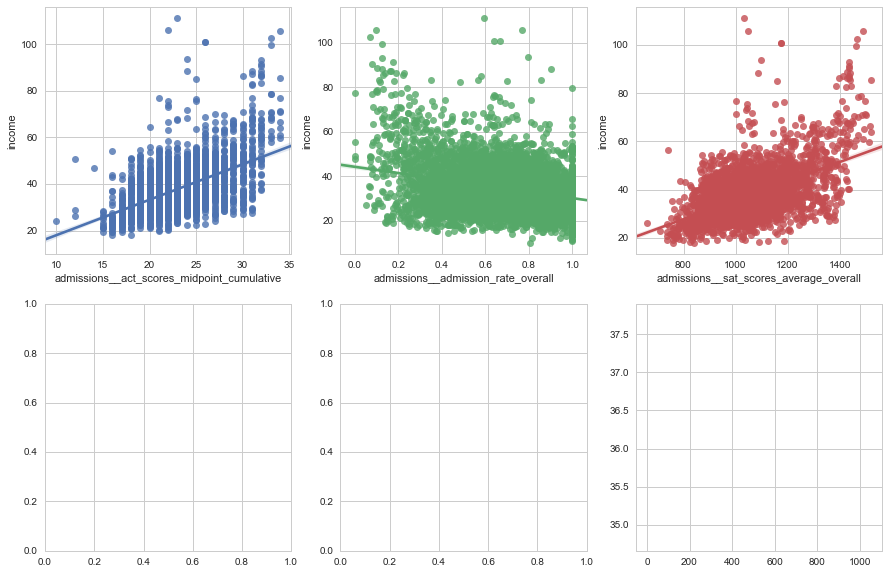

In [10]:
#ADMISSIONPLOTS

sns.set_style('whitegrid')
f,axes = plt.subplots(2,3,figsize=(15,10))

#sns.regplot(y="income", x="admissions__act_scores_25th_percentile_cumulative", data=Z, ax=axes[0,0])
#sns.regplot(y="income", x="admissions__act_scores_25th_percentile_english", data=Z, ax=axes[0,1])
#sns.regplot(y="income", x="admissions__act_scores_25th_percentile_math", data=Z, ax=axes[0,2])
#sns.regplot(y="income", x="admissions__act_scores_25th_percentile_writing", data=Z, ax=axes[1,0])
#sns.regplot(y="income", x="admissions__act_scores_75th_percentile_cumulative", data=Z, ax=axes[1,1])
#sns.regplot(y="income", x="admissions__act_scores_75th_percentile_english", data=Z, ax=axes[1,2])
#sns.regplot(y="income", x="admissions__act_scores_75th_percentile_math", data=Z, ax=axes[2,0])
#sns.regplot(y="income", x="admissions__act_scores_75th_percentile_writing", data=Z, ax=axes[2,1])
sns.regplot(y="income", x="admissions__act_scores_midpoint_cumulative", data=Z, ax=axes[0,0])
#sns.regplot(y="income", x="admissions__act_scores_midpoint_english", data=Z, ax=axes[3,0])
#sns.regplot(y="income", x="admissions__act_scores_midpoint_math", data=Z, ax=axes[3,1])
#sns.regplot(y="income", x="admissions__act_scores_midpoint_writing", data=Z, ax=axes[3,2])
#sns.regplot(y="income", x="admissions__admission_rate_by_ope_id", data=Z, ax=axes[4,0])
sns.regplot(y="income", x="admissions__admission_rate_overall", data=Z, ax=axes[0,1])
#sns.regplot(y="income", x="admissions__sat_scores_25th_percentile_critical_reading", data=Z, ax=axes[4,2])
#sns.regplot(y="income", x="admissions__sat_scores_25th_percentile_math", data=Z, ax=axes[5,0])
#sns.regplot(y="income", x="admissions__sat_scores_25th_percentile_writing", data=Z, ax=axes[5,1])
#sns.regplot(y="income", x="admissions__sat_scores_75th_percentile_critical_reading", data=Z, ax=axes[5,2])
#sns.regplot(y="income", x="admissions__sat_scores_75th_percentile_math", data=Z, ax=axes[6,0])
#sns.regplot(y="income", x="admissions__sat_scores_75th_percentile_writing", data=Z, ax=axes[6,1])
#sns.regplot(y="income", x="admissions__sat_scores_average_by_ope_id", data=Z, ax=axes[6,2])
sns.regplot(y="income", x="admissions__sat_scores_average_overall", data=Z, ax=axes[0,2])
#sns.regplot(y="income", x="admissions__sat_scores_midpoint_critical_reading", data=Z, ax=axes[7,1])
#sns.regplot(y="income", x="admissions__sat_scores_midpoint_math", data=Z, ax=axes[7,2])
#sns.regplot(y="income", x="admissions__sat_scores_midpoint_writing", data=Z, ax=axes[8,0])

plt.show()

### Completion

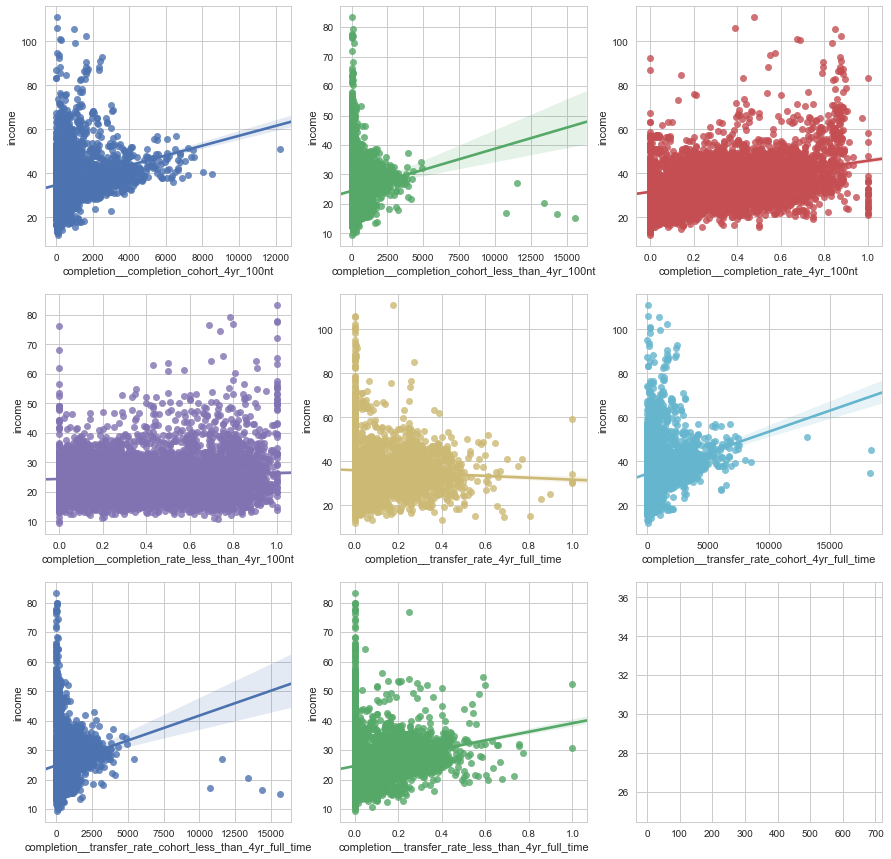

In [11]:
#COMPLETION PLOTS

sns.set_style('whitegrid')
f,axes = plt.subplots(3,3,figsize=(15,15))

sns.regplot(y="income", x="completion__completion_cohort_4yr_100nt", data=Z, ax=axes[0,0])
sns.regplot(y="income", x="completion__completion_cohort_less_than_4yr_100nt", data=Z, ax=axes[0,1])
sns.regplot(y="income", x="completion__completion_rate_4yr_100nt", data=Z, ax=axes[0,2])
sns.regplot(y="income", x="completion__completion_rate_less_than_4yr_100nt", data=Z, ax=axes[1,0])
sns.regplot(y="income", x="completion__transfer_rate_4yr_full_time", data=Z, ax=axes[1,1])
sns.regplot(y="income", x="completion__transfer_rate_cohort_4yr_full_time", data=Z, ax=axes[1,2])
sns.regplot(y="income", x="completion__transfer_rate_cohort_less_than_4yr_full_time", data=Z, ax=axes[2,0])
sns.regplot(y="income", x="completion__transfer_rate_less_than_4yr_full_time", data=Z, ax=axes[2,1])

plt.show()

### Cost

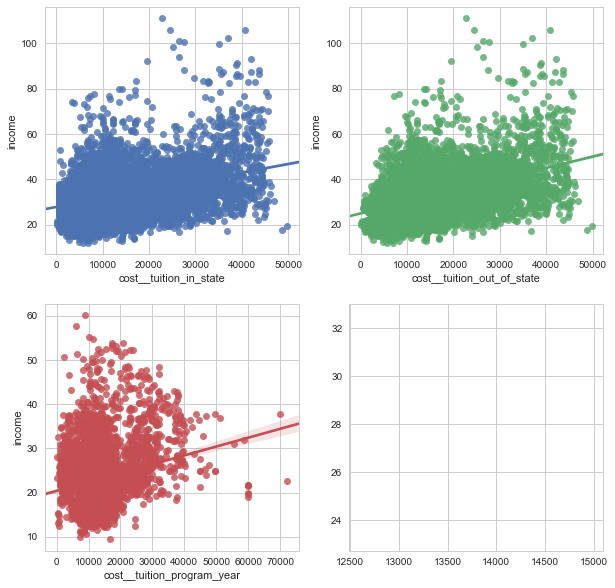

In [12]:
#COST PLOTS

sns.set_style('whitegrid')
f,axes = plt.subplots(2,2,figsize=(10,10))

sns.regplot(y="income", x="cost__tuition_in_state", data=Z, ax=axes[0,0])
sns.regplot(y="income", x="cost__tuition_out_of_state", data=Z, ax=axes[0,1])
sns.regplot(y="income", x="cost__tuition_program_year", data=Z, ax=axes[1,0])

plt.show()

### Year

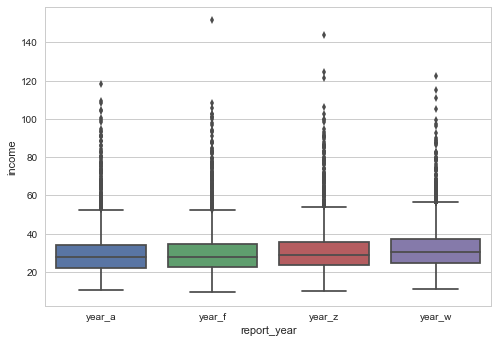

In [13]:
#SCHOOL PLOTS

sns.set_style('whitegrid')
#f,axes = plt.subplots(1,1,figsize=(30,30))

sns.boxplot(y="income", x="report_year", data=Z)

plt.show()

In [14]:
Z.groupby('report_year').income.agg(['median', 'mean', 'count', 'std', 'min', 'max'])

,median,mean,count,std,min,max
report_year,,,,,,
year_a,27.80,29.499083,4470,10.928584,10.6,118.4
year_f,27.90,29.892562,4423,11.305736,9.4,151.5
year_w,30.40,32.196949,4032,11.308555,10.8,122.5
year_z,28.75,30.952559,4182,11.494096,10.0,143.6


### School

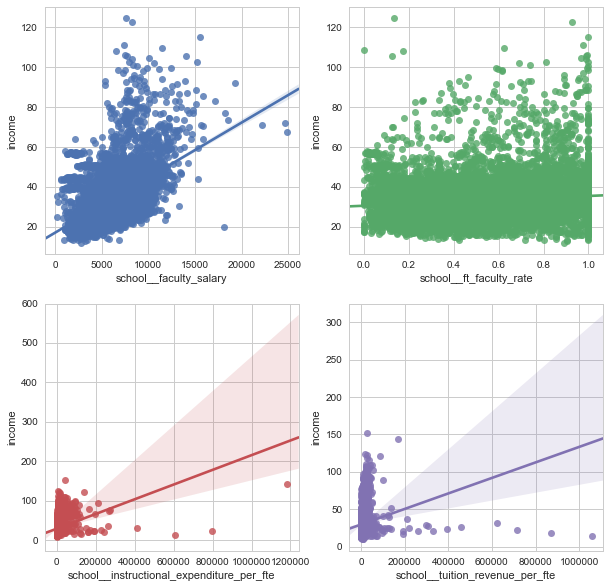

In [15]:
#SCHOOL PLOTS

sns.set_style('whitegrid')
f,axes = plt.subplots(2,2,figsize=(10,10))

sns.regplot(y="income", x="school__faculty_salary", data=Z, ax=axes[0,0])
sns.regplot(y="income", x="school__ft_faculty_rate", data=Z, ax=axes[0,1])
sns.regplot(y="income", x="school__instructional_expenditure_per_fte", data=Z, ax=axes[1,0])
sns.regplot(y="income", x="school__tuition_revenue_per_fte", data=Z, ax=axes[1,1])


plt.show()

In [16]:
school = Z.loc[Z.school__instructional_expenditure_per_fte < 40000,['school__instructional_expenditure_per_fte', 'school__tuition_revenue_per_fte', 'income']]

In [17]:
school.head()

,school__instructional_expenditure_per_fte,school__tuition_revenue_per_fte,income
row_id,,,
0,8294.0,7736.0,46.9
1,2794.0,11199.0,26.7
3,1781.0,15404.0,28.1
4,4714.0,11847.0,41.6
5,7682.0,6972.0,34.3


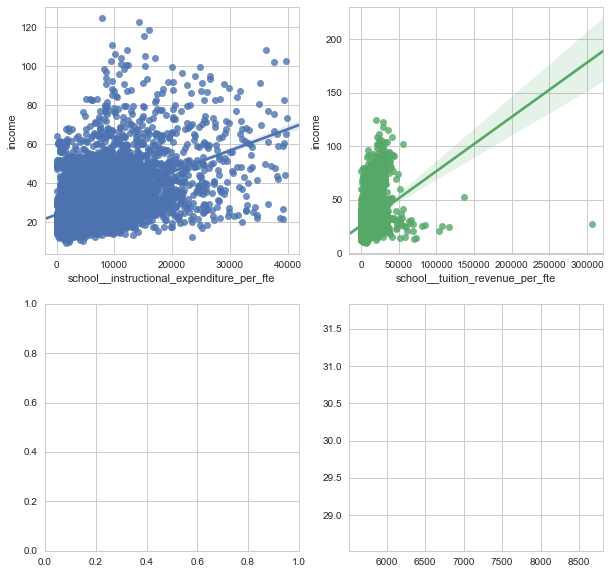

In [18]:
sns.set_style('whitegrid')
f,axes = plt.subplots(2,2,figsize=(10,10))

sns.regplot(y="income", x="school__instructional_expenditure_per_fte", data=school, ax=axes[0,0])
sns.regplot(y="income", x="school__tuition_revenue_per_fte", data=school, ax=axes[0,1])


plt.show()

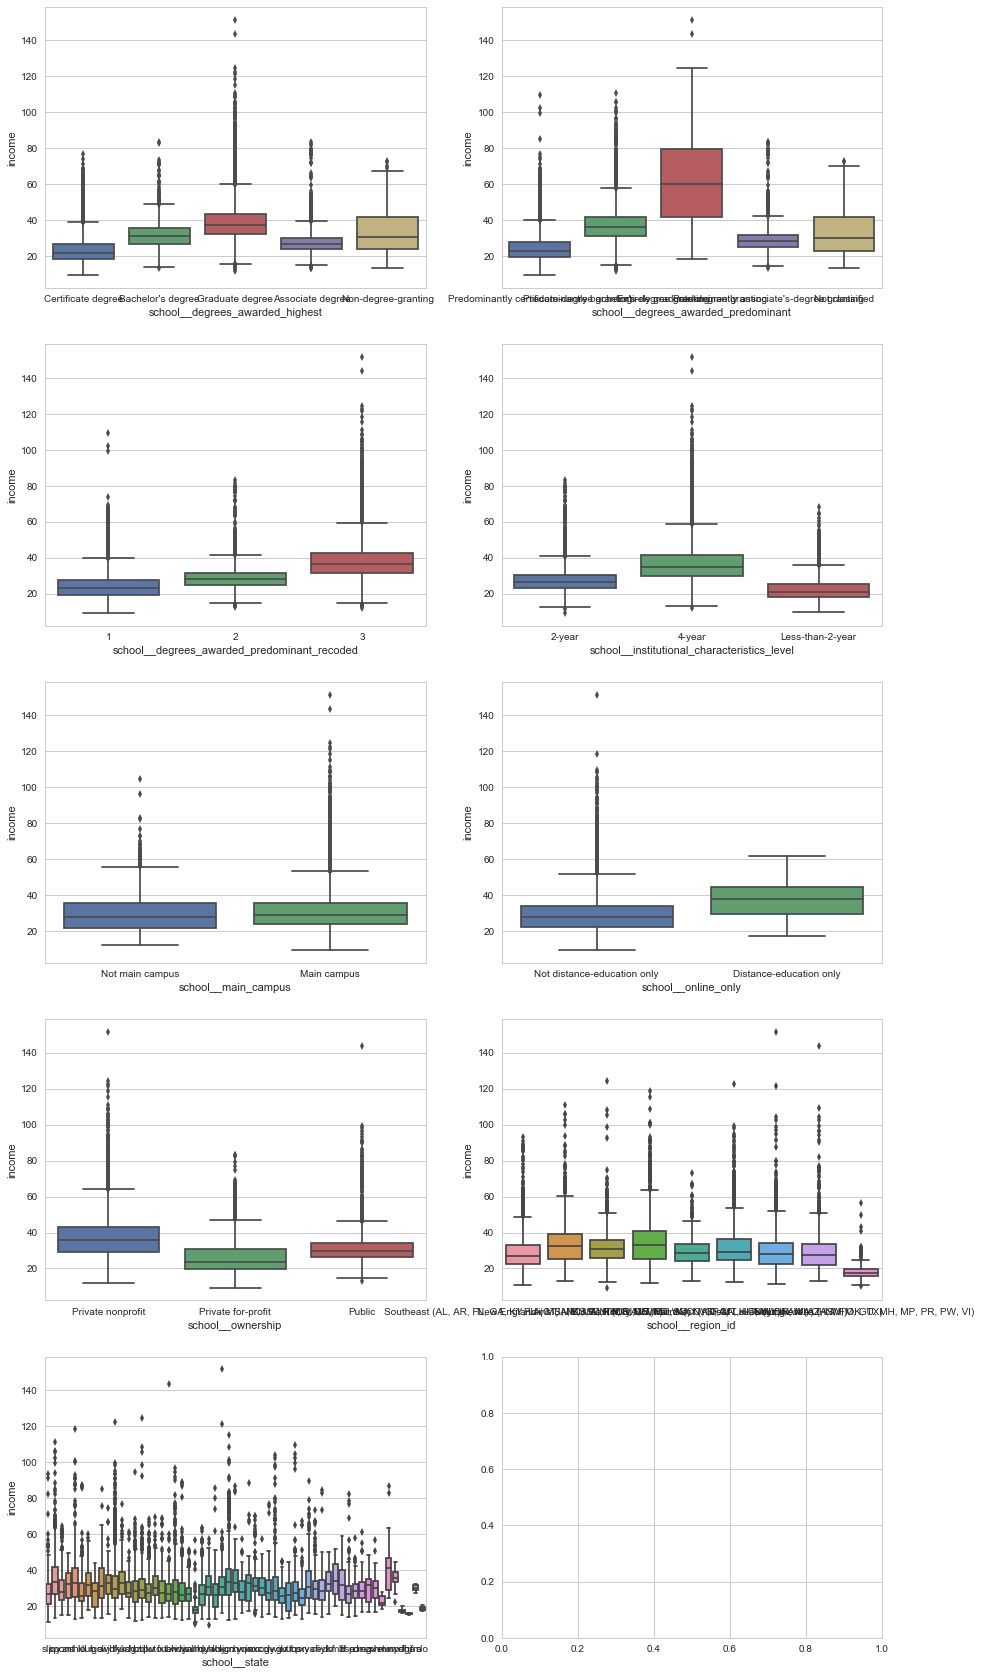

In [19]:
#SCHOOL 

sns.set_style('whitegrid')
f,axes = plt.subplots(5,2,figsize=(15,30))

sns.boxplot(x="school__degrees_awarded_highest", y="income", data=Z, ax=axes[0, 0])
sns.boxplot(x="school__degrees_awarded_predominant", y="income", data=Z, ax=axes[0, 1])
sns.boxplot(x="school__degrees_awarded_predominant_recoded", y="income", data=Z, ax=axes[1, 0])
sns.boxplot(x="school__institutional_characteristics_level", y="income", data=Z, ax=axes[1, 1])
sns.boxplot(x="school__main_campus", y="income", data=Z, ax=axes[2, 0])
sns.boxplot(x="school__online_only", y="income", data=Z, ax=axes[2, 1])
sns.boxplot(x="school__ownership", y="income", data=Z, ax=axes[3, 0])
sns.boxplot(x="school__region_id", y="income", data=Z, ax=axes[3, 1])
sns.boxplot(x="school__state", y="income", data=Z, ax=axes[4, 0])

plt.show()

In [20]:
Z.groupby('school__degrees_awarded_highest').income.agg(['median', 'mean', 'count', 'std', 'min', 'max'])

,median,mean,count,std,min,max
school__degrees_awarded_highest,,,,,,
Associate degree,27.1,27.640869,4693,6.330423,13.3,83.3
Bachelor's degree,31.2,31.679471,2153,7.779342,13.3,83.3
Certificate degree,21.7,23.787955,4757,8.216252,9.4,76.7
Graduate degree,37.3,39.702479,4558,12.976327,11.9,151.5
Non-degree-granting,30.9,33.075793,946,11.765570,13.4,73.0


In [21]:
Z.groupby('school__degrees_awarded_predominant').income.agg(['median', 'mean', 'count', 'std', 'min', 'max'])

,median,mean,count,std,min,max
school__degrees_awarded_predominant,,,,,,
Entirely graduate-degree granting,60.3,62.909677,186,25.329080,18.6,151.5
Not classified,30.4,32.723127,761,12.132403,13.4,73.0
Predominantly associate's-degree granting,28.4,29.008327,4167,6.969090,13.3,83.3
Predominantly bachelor's-degree granting,36.2,37.625128,5452,10.747747,11.9,111.0
Predominantly certificate-degree granting,23.1,24.571778,6541,7.896399,9.4,109.5


In [22]:
Z.groupby('school__degrees_awarded_predominant_recoded').income.agg(['median', 'mean', 'count', 'std', 'min', 'max'])

,median,mean,count,std,min,max
school__degrees_awarded_predominant_recoded,,,,,,
1,22.90,24.260911,6434,7.655241,9.4,109.5
2,27.90,28.364711,4245,6.824813,12.5,83.3
3,36.45,38.399891,6428,12.092293,11.9,151.5


In [23]:
Z.groupby('school__institutional_characteristics_level').income.agg(['median', 'mean', 'count', 'std', 'min', 'max'])

,median,mean,count,std,min,max
school__institutional_characteristics_level,,,,,,
2-year,26.7,27.408086,5874,7.479622,9.4,83.3
4-year,35.1,37.065355,7499,11.993227,11.9,151.5
Less-than-2-year,21.1,22.600214,3734,6.667241,10.0,68.0


In [24]:
Z.groupby('school__main_campus').income.agg(['median', 'mean', 'count', 'std', 'min', 'max'])

,median,mean,count,std,min,max
school__main_campus,,,,,,
Main campus,29.0,30.899752,12489,11.648077,9.4,151.5
Not main campus,27.6,29.759723,4618,10.265530,12.1,104.4


In [25]:
Z.groupby('school__online_only').income.agg(['median', 'mean', 'count', 'std', 'min', 'max'])

,median,mean,count,std,min,max
school__online_only,,,,,,
Distance-education only,37.95,38.292857,28,12.013725,17.2,61.8
Not distance-education only,27.70,29.582690,8440,11.099483,9.4,151.5


In [26]:
Z.groupby('school__ownership').income.agg(['median', 'mean', 'count', 'std', 'min', 'max'])

,median,mean,count,std,min,max
school__ownership,,,,,,
Private for-profit,23.7,26.205836,7436,9.222184,9.4,83.3
Private nonprofit,35.6,37.461798,4183,13.878329,11.9,151.5
Public,29.6,31.298852,5488,8.583190,13.3,143.6


In [27]:
Z.groupby('school__region_id').income.agg(['median', 'mean', 'count', 'std', 'min', 'max'])

,median,mean,count,std,min,max
school__region_id,,,,,,
"Far West (AK, CA, HI, NV, OR, WA)",29.4,31.781621,2258,11.828239,12.4,122.5
"Great Lakes (IL, IN, MI, OH, WI)",28.1,29.605631,2575,10.513581,11.6,151.5
"Mid East (DE, DC, MD, NJ, NY, PA)",32.8,34.382423,2674,12.970124,11.9,118.4
"New England (CT, ME, MA, NH, RI, VT)",32.3,34.448703,1002,13.257533,13.3,111.0
"Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)",17.7,18.386595,373,4.644477,10.0,56.5
"Plains (IA, KS, MN, MO, NE, ND, SD)",30.6,31.403942,1573,9.703989,9.4,124.4
"Rocky Mountains (CO, ID, MT, UT, WY)",28.6,29.541857,614,9.013660,13.0,73.2
"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)",26.8,28.841402,4222,9.767179,10.8,93.2
"Southwest (AZ, NM, OK, TX)",27.4,29.030892,1816,10.938800,12.9,143.6


In [28]:
Z.groupby('school__state').income.agg(['median', 'mean', 'count', 'std', 'min', 'max'])

,median,mean,count,std,min,max
school__state,,,,,,
ahh,17.70,18.108621,348,4.426510,10.0,56.5
axc,31.00,32.530203,394,8.456250,15.3,70.2
bkc,30.75,32.054851,268,12.614168,15.8,151.5
bww,27.70,29.066190,1050,11.040987,12.9,96.7
ccg,30.10,30.406438,233,7.703224,13.9,57.0
cfi,29.55,30.675000,292,9.510820,15.3,73.2
cmz,34.05,33.892857,42,9.806852,20.1,51.7
dfy,29.20,32.169949,1574,12.731008,12.4,122.5
dkf,32.10,32.133333,33,7.604549,15.3,50.2


### Student

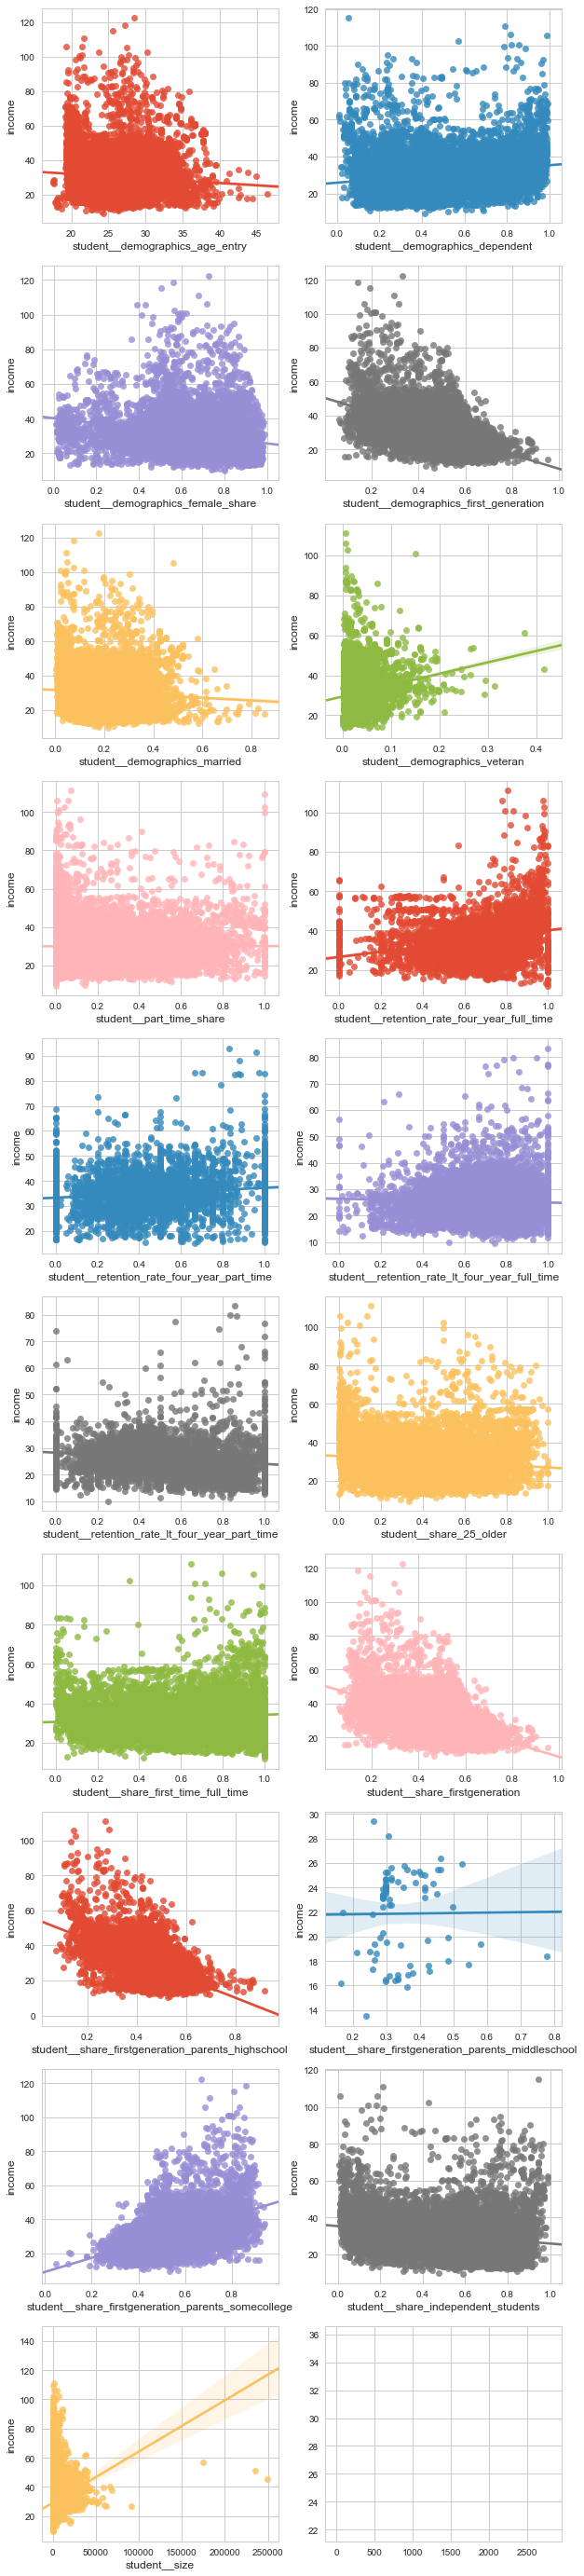

In [4]:
#STUDENT PLOTS

sns.set_style('whitegrid')
f,axes = plt.subplots(10,2,figsize=(10,50))

sns.regplot(y="income", x="student__demographics_age_entry", data=Z, ax=axes[0,0])
sns.regplot(y="income", x="student__demographics_dependent", data=Z, ax=axes[0,1])
sns.regplot(y="income", x="student__demographics_female_share", data=Z, ax=axes[1,0])
sns.regplot(y="income", x="student__demographics_first_generation", data=Z, ax=axes[1,1])
sns.regplot(y="income", x="student__demographics_married", data=Z, ax=axes[2,0])
sns.regplot(y="income", x="student__demographics_veteran", data=Z, ax=axes[2,1])
sns.regplot(y="income", x="student__part_time_share", data=Z, ax=axes[3,0])
sns.regplot(y="income", x="student__retention_rate_four_year_full_time", data=Z, ax=axes[3,1])
sns.regplot(y="income", x="student__retention_rate_four_year_part_time", data=Z, ax=axes[4,0])
sns.regplot(y="income", x="student__retention_rate_lt_four_year_full_time", data=Z, ax=axes[4,1])
sns.regplot(y="income", x="student__retention_rate_lt_four_year_part_time", data=Z, ax=axes[5,0])
sns.regplot(y="income", x="student__share_25_older", data=Z, ax=axes[5,1])
sns.regplot(y="income", x="student__share_first_time_full_time", data=Z, ax=axes[6,0])
sns.regplot(y="income", x="student__share_firstgeneration", data=Z, ax=axes[6,1])
sns.regplot(y="income", x="student__share_firstgeneration_parents_highschool", data=Z, ax=axes[7,0])
sns.regplot(y="income", x="student__share_firstgeneration_parents_middleschool", data=Z, ax=axes[7,1])
sns.regplot(y="income", x="student__share_firstgeneration_parents_somecollege", data=Z, ax=axes[8,0])
sns.regplot(y="income", x="student__share_independent_students", data=Z, ax=axes[8,1])
sns.regplot(y="income", x="student__size", data=Z, ax=axes[9,0])

plt.show()

In [30]:
student = Z.loc[Z.student__size < 50000,['student__size', 'school__tuition_revenue_per_fte', 'income']]

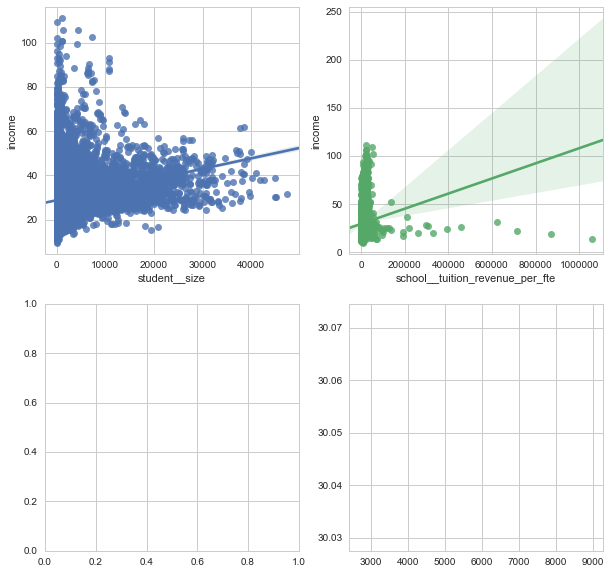

In [31]:
sns.set_style('whitegrid')
f,axes = plt.subplots(2,2,figsize=(10,10))

sns.regplot(y="income", x="student__size", data=student, ax=axes[0,0])
sns.regplot(y="income", x="school__tuition_revenue_per_fte", data=student, ax=axes[0,1])


plt.show()

# Model

In [32]:
#Create dummies for categorical data

Z = pd.get_dummies(Z)

In [33]:
#Fill all missing values with an unusual negative number

Z = Z.fillna(-10000)

In [34]:
#Create the final dataframes

y_final = Z['income'].copy()
Z.drop(labels=['income'], inplace=True, axis=1)

In [35]:
#Split the data into training and testing data

from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(Z, y_final, random_state=7, test_size=0.3)

In [36]:
#Fit the model - RandomizedSearchCV is commented out because of too high computational requirements

#parameters = {'max_depth': [10, 11],
#              'n_estimators': [2000, 6000],
#              'min_samples_leaf': [6, 7, 8, 9, 10],
#              'alpha': [0.8, 0.9, 0.99],
#             }


#model = GradientBoostingRegressor()

#grid = RandomizedSearchCV(model, parameters, cv=3, n_jobs=-1, n_iter=2)

#grid.fit(Z_final, y_final)

#print grid.best_score_
#print grid.best_params_

model = GradientBoostingRegressor(alpha=0.99, n_estimators=5000, learning_rate=0.05,
                                   max_depth=11, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model.fit(data_train, label_train)

GradientBoostingRegressor(alpha=0.99, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=11,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=5000, presort='auto', random_state=5,
             subsample=1.0, verbose=0, warm_start=False)

# Results

In [37]:
#Score the model

score = model.score(data_test, label_test)
print(score)

0.901605287421


In [38]:
#Compute the  root-mean-square error

y_pred = model.predict(data_test)

rms = sqrt(mean_squared_error(label_test, y_pred))

print(rms)

3.53211744243


In [39]:
y_train_pred = model.predict(data_train)
y_test_pred = model.predict(data_test)

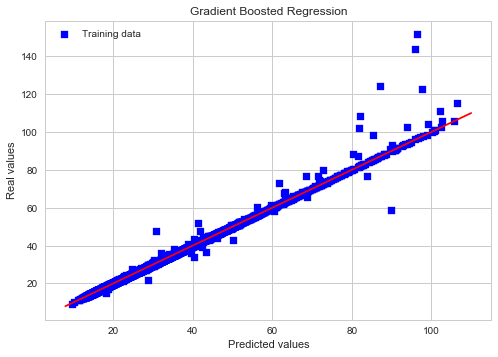

In [40]:
# Plot predictions
plt.scatter(y_train_pred, label_train, c = "blue", marker = "s", label = "Training data")
plt.title("Gradient Boosted Regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([8, 110], [8, 110], c = "red")
plt.show()

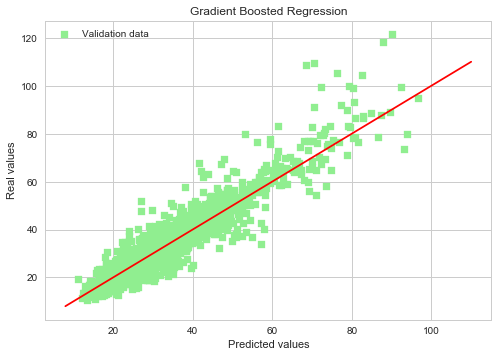

In [41]:
plt.scatter(y_test_pred, label_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Gradient Boosted Regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([8, 110], [8, 110], c = "red")
plt.show()

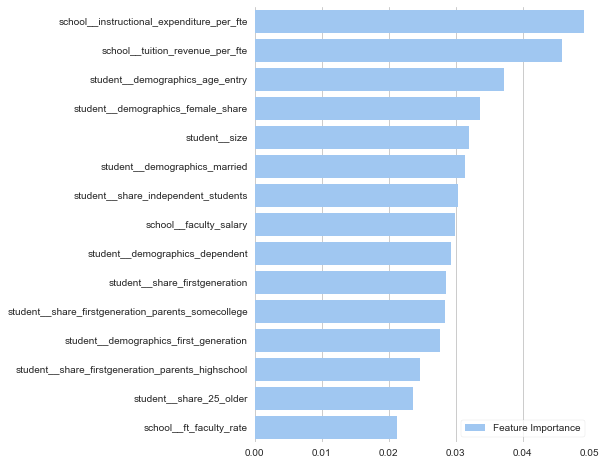

In [42]:
#Plot the most important features

dfX = pd.DataFrame({'importances': model.feature_importances_, 'feature': data_train.columns}) 
dfX = dfX.sort_values('importances', ascending=False).iloc[:15]

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 8))

# Plot
sns.set_color_codes("pastel")
sns.barplot(x="importances", y="feature", data=dfX,
            label="Feature Importance", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 0.05), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=True)
plt.show()

# Predict

In [43]:
#Load the test data

TEST = pd.read_csv('test_values.csv', index_col=0)

In [44]:
#Prepare the data such as the training data was prepared

TEST = pd.get_dummies(TEST)
TEST = TEST.fillna(-10000)
TEST.drop(labels=['school__state_nhl'], inplace=True, axis=1) 

In [45]:
#Predict income

result = model.predict(TEST)

In [46]:
TEST['income'] = result

In [47]:
TEST.head()

,academics__program_assoc_agriculture,academics__program_assoc_architecture,academics__program_assoc_biological,academics__program_assoc_business_marketing,academics__program_assoc_communication,academics__program_assoc_communications_technology,academics__program_assoc_computer,academics__program_assoc_construction,academics__program_assoc_education,academics__program_assoc_engineering,...,school__state_uah,school__state_uuo,school__state_vvi,school__state_wjh,school__state_wto,school__state_xve,school__state_xws,school__state_zdl,school__state_znt,income
row_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,75.943228
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,78.033791
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,63.055115
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,41.162595
11,-10000.0,-10000.0,-10000.0,1.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,0.0,...,0,0,0,0,0,0,0,0,0,35.678347


In [48]:
#TEST_ID = TEST.index
col_list = ['income']
TEST = TEST[col_list]


In [49]:
TEST.head()

,income
row_id,
2,75.943228
8,78.033791
9,63.055115
10,41.162595
11,35.678347


In [50]:
#TEST.to_csv('result1210.csv', sep=',')